In [237]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from random import randint
from IPython.display import Image
from sklearn.metrics import mean_absolute_error
from abc import ABC
from abc import abstractmethod
import progressbar
import math
from math import *
from random import seed
from random import random
import itertools 
from itertools import permutations

In [238]:
%matplotlib inline

## ■ Question 2

Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT
(which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in
the LCC).

Importing all the graphs:

In [2]:
import glob
import os

file_list = glob.glob(os.path.join(os.getcwd(), "../../Data/Project/fb100/", "*.graphml"))
Graphs = []

for file in file_list:
    Graphs.append(nx.read_graphml(file))
    print("[",file_list.index(file),"]",file[184:], "graph successfully imported.")

[ 0 ] American75.graphml graph successfully imported.
[ 1 ] Amherst41.graphml graph successfully imported.
[ 2 ] Auburn71.graphml graph successfully imported.
[ 3 ] Baylor93.graphml graph successfully imported.
[ 4 ] BC17.graphml graph successfully imported.
[ 5 ] Berkeley13.graphml graph successfully imported.
[ 6 ] Bingham82.graphml graph successfully imported.
[ 7 ] Bowdoin47.graphml graph successfully imported.
[ 8 ] Brandeis99.graphml graph successfully imported.
[ 9 ] Brown11.graphml graph successfully imported.
[ 10 ] BU10.graphml graph successfully imported.
[ 11 ] Bucknell39.graphml graph successfully imported.
[ 12 ] Cal65.graphml graph successfully imported.
[ 13 ] Caltech36.graphml graph successfully imported.
[ 14 ] Carnegie49.graphml graph successfully imported.
[ 15 ] Colgate88.graphml graph successfully imported.
[ 16 ] Columbia2.graphml graph successfully imported.
[ 17 ] Cornell5.graphml graph successfully imported.
[ 18 ] Dartmouth6.graphml graph successfully importe

In [3]:
GraphCaltech = Graphs[13]
GraphMIT = Graphs[38]
GraphJohns = Graphs[30]

or manually:

In [ ]:
GraphCaltech = nx.read_graphml('../../Data/Project/fb100/Caltech36.graphml')
GraphMIT = nx.read_graphml('../../Data/Project/fb100/MIT8.graphml')
GraphJohns = nx.read_graphml('../../Data/Project/fb100/Johns Hopkins55.graphml')

#### a) Degree distribution

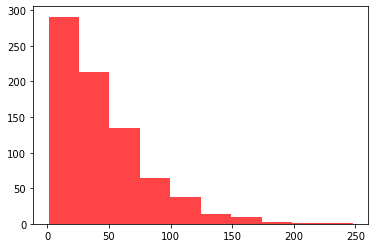

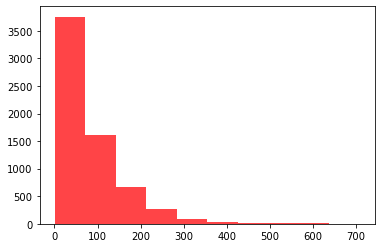

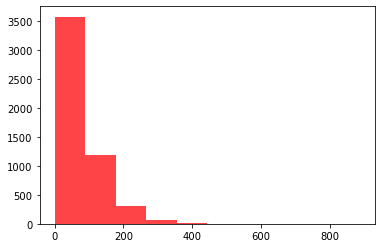

In [4]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, color='#ff4447')
    plt.show()

plot_degree_dist(GraphCaltech)
plot_degree_dist(GraphMIT)
plot_degree_dist(GraphJohns)

#### b) Global clustering coeficient, mean local clustering coeficient and edge density

##### Global Clustering

In [5]:
print("Caltech: ",nx.transitivity(GraphCaltech))
print("MIT: ",nx.transitivity(GraphMIT))
print("Johns: ",nx.transitivity(GraphJohns))

Caltech:  0.2912826901150874
MIT:  0.18028845093502427
Johns:  0.19316123901594015


##### Mean local clustering

In [6]:
print("Caltech: ",nx.average_clustering(GraphCaltech))
print("MIT: ",nx.average_clustering(GraphMIT))
print("Johns: ",nx.average_clustering(GraphJohns))

Caltech:  0.40929439048517247
MIT:  0.2712187419501315
Johns:  0.26839307371293525


##### Edge density

In [7]:
print("Caltech: ",nx.density(GraphCaltech))
print("MIT: ",nx.density(GraphMIT))
print("Johns: ",nx.density(GraphJohns))

Caltech:  0.05640442132639792
MIT:  0.012118119495041378
Johns:  0.013910200162372396


#### c) Scatter plot

In [8]:
def scatter_plot(G):
    plt.xlabel(r"Degree ")
    plt.ylabel(r"Clustering")
    
    degree = [val for (node, val) in G.degree]
    t = np.arange(len(degree))
    clustering = nx.clustering(G)
    
    plt.scatter(degree, list(clustering.values()), c=t,cmap='plasma');
    plt.colorbar()
    plt.show()

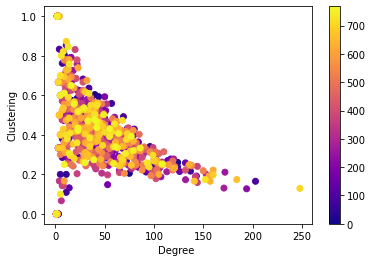

In [9]:
scatter_plot(GraphCaltech)

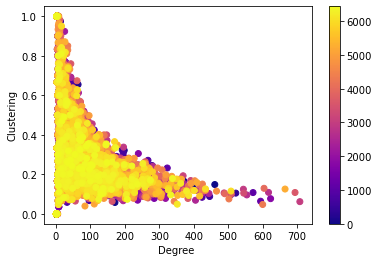

In [10]:
scatter_plot(GraphMIT)

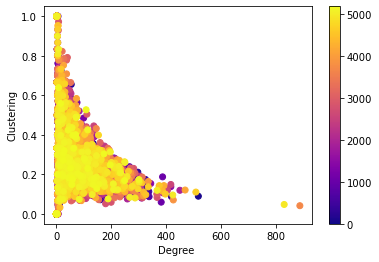

In [11]:
scatter_plot(GraphJohns)

## ■ Question 3

In this question we expect you will perform the computation on all the available
graph in the dataset.
Of the FB100 networks, investigate the assortativity patterns for three vertex
attributes: 

(i) student/faculty status

(ii) major

(iii) vertex degree

(iiii) dorm. 

Treat these networks as simple graphs in your analysis.

<h4 style="color:#ff4447;">Dorm Assortativity</h4>

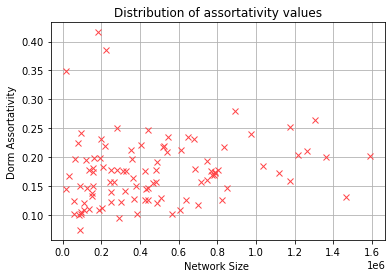

In [12]:
network_size = []
dorm_assortativity = []

for x in range(0, len(Graphs)):
    network_size.append(Graphs[x].size())
    dorm_assortativity.append(nx.attribute_assortativity_coefficient(Graphs[x], "dorm"))

plt.xlabel(r"Network Size ")
plt.ylabel(r"Dorm Assortativity")
plt.grid(True)
plt.title('Distribution of assortativity values')
plt.plot(network_size, dorm_assortativity, 'x', color='#ff4447');

(0.0, 0.425258419600651)

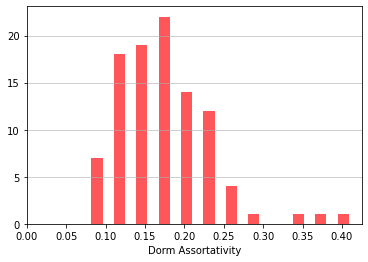

In [13]:
plt.hist(dorm_assortativity, bins='auto', color='#ff4447',alpha=0.9, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dorm Assortativity')
plt.xlim(0)

<h4 style="color:#257985;">Major Index</h4>

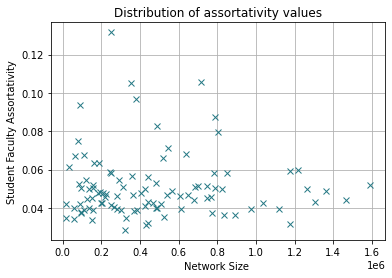

In [14]:
network_size = []
major_index_assortativity = []

for x in range(0, len(Graphs)):
    network_size.append(Graphs[x].size())
    major_index_assortativity.append(nx.attribute_assortativity_coefficient(Graphs[x], "major_index"))

plt.xlabel(r"Network Size ")
plt.ylabel(r"Student Faculty Assortativity")
plt.grid(True)
plt.title('Distribution of assortativity values')
plt.plot(network_size, major_index_assortativity, 'x', color='#257985');

(0.0, 0.13503603282130405)

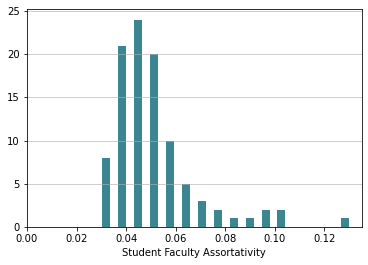

In [15]:
plt.hist(major_index_assortativity, bins='auto', color='#257985',alpha=0.9, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Student Faculty Assortativity')
plt.xlim(0)

<h4 style="color:#ffbb00;">Student Faculty</h4>

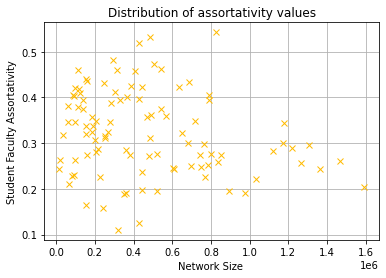

In [16]:
network_size = []
student_fac_assortativity = []

for x in range(0, len(Graphs)):
    network_size.append(Graphs[x].size())
    student_fac_assortativity.append(nx.attribute_assortativity_coefficient(Graphs[x], "student_fac"))

plt.xlabel(r"Network Size ")
plt.ylabel(r"Student Faculty Assortativity")
plt.grid(True)
plt.title('Distribution of assortativity values')
plt.plot(network_size, student_fac_assortativity, 'x', color='#ffbb00');

(0.0, 0.5493816994611223)

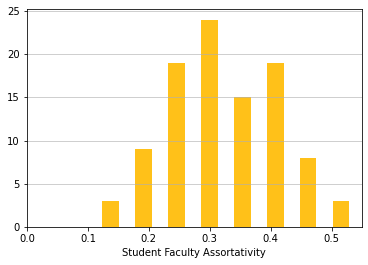

In [17]:
plt.hist(student_fac_assortativity, bins='auto', color='#ffbb00',alpha=0.9, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Student Faculty Assortativity')
plt.xlim(0)

<h4 style="color:#aebd38;">Degree</h4>

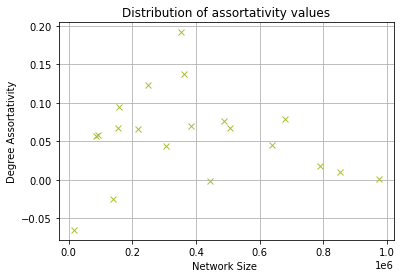

In [18]:
network_size = []
degree_assortativity = []

for x in range(0, 20):
    network_size.append(Graphs[x].size())
    degree_assortativity.append(nx.degree_assortativity_coefficient(Graphs[x]))

plt.xlabel(r"Network Size ")
plt.ylabel(r"Degree Assortativity")
plt.grid(True)
plt.title('Distribution of assortativity values')
plt.plot(network_size, degree_assortativity, 'x', color='#aebd38');

Text(0.5, 0, 'Degree Assortativity')

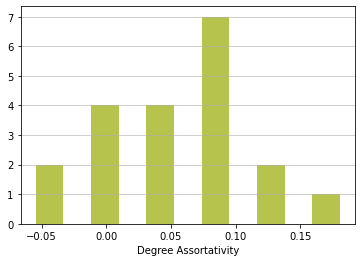

In [19]:
plt.hist(degree_assortativity, bins='auto', color='#aebd38',alpha=0.9, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Degree Assortativity')

## ■ Question 4

In this question we expect you will compute the link prediction algorithms on a large
set of graphs (> 10).

##### (b) Implement the following link prediction metrics:

In [26]:
def link_predictor(method,f,G,random_n):
    
    def unique(G):
        common_neighbors_list = []
        counter1 = 0
        counter2 = 0 
        for j in range(len(G.nodes)-1):
            for k in range(len(G.nodes)-1):
                pair = str(counter1),str(counter2)
                common_neighbors_list.append(pair)
                counter2 = counter2 + 1
            counter2 = 0
            counter1 = counter1 + 1
        return list(set(tuple(sorted(x)) for x in common_neighbors_list))

    def common_neighbors_centrality(G):
        unique_list = unique(G)
        common_neighbors_list = []
        length = len(unique_list)
        counter1 = 0
        for _ in range(length-1):
            pair = unique_list[counter1]
            cn = sorted(nx.common_neighbors(G, pair[0], pair[1]))
            pair_with_value = pair[0],pair[1],len(cn)
            common_neighbors_list.append(pair_with_value) 
            counter1 = counter1 + 1
        return common_neighbors_list
    
    # Taking a random sample of edges with f [0.05, 0.1, 0.15, 0.2]
    edge_subset = random.sample(G.edges(), int(f * G.number_of_edges()))
    # Removing some edges
    G = G.copy()
    G.remove_edges_from(edge_subset)
    
    # Just a simple selector
    if method == 'jaccard':
        prediction_method = list(nx.jaccard_coefficient(G))
    elif method == 'adamic':
        prediction_method = list(nx.adamic_adar_index(G))
    elif method == 'common_neighbors':
        prediction_method = common_neighbors_centrality(G)
    else:
        print("Didn't specify a correct prediction method.")
    
    # Processing the list of tuples, first sorting, then deleting the method coefficient and then
    # converting a numpy.array to a list of tuples, in order to get the intersection later.
    prediction_method_sorted = sorted(prediction_method,key=lambda l:l[2], reverse=True)
    prediction_method_processed = np.delete(prediction_method_sorted, 2, axis=1)
    prediction_method_processed = list(map(tuple, prediction_method_processed))
    
    # Resizing to the random number generated
    prediction_method_processed = prediction_method_processed[0:random_n]
    
    # Gettin the intersection list between de predicted list and the subset of edges extracted.
    intersection_list = [value for value in prediction_method_processed if value in edge_subset]
    
    #result_string = 
    return "╚ "+str(method)+" method: "+str(len(intersection_list))+" of "+str(len(edge_subset))

##### c) Evaluating a link predictor:

In [165]:
# Using Caltech36 for evaluation, because is the smaller graph in the dataset.
Graph_evaluation_lp = Graphs[13]

In [177]:
random_n = randint(1,Graph_evaluation_lp.number_of_edges())
random_n

15224

In [178]:
print(link_predictor('common_neighbors',0.05,Graph_evaluation_lp,random_n))
print(link_predictor('jaccard',0.05,Graph_evaluation_lp,random_n))
print(link_predictor('adamic',0.05,Graph_evaluation_lp,random_n))

╚ common_neighbors method: 383 of 832
╚ jaccard method: 299 of 832
╚ adamic method: 295 of 832


##### (d) Choose a couple of graphs in the facebook100 dataset run and evaluate each link predictor on them, and conclude on the eficiency of the following metrics: 

In [186]:
print('Size of the intersections \n')

selected_graphs_names = ['Caltech36','Haverford76','Swarthmore42',]
selected_graphs = []
selected_graphs.append(Graphs[13])
selected_graphs.append(Graphs[26])
selected_graphs.append(Graphs[58])

i=0
random_n = randint(1,Graphs[58].number_of_edges())

for graph in selected_graphs:
    print(selected_graphs_names[i]+" with random_n: "+str(random_n))
    print(link_predictor('common_neighbors',0.05,graph,random_n))
    print(link_predictor('jaccard',0.05,graph,random_n))
    print(link_predictor('adamic',0.05,graph,random_n)+'\n')
    i=i+1

Size of the intersections 

Caltech36 with random_n: 54585
╚ common_neighbors method: 642 of 832
╚ jaccard method: 400 of 832
╚ adamic method: 365 of 832

Haverford76 with random_n: 54585
╚ common_neighbors method: 761 of 2979
╚ jaccard method: 1023 of 2979
╚ adamic method: 942 of 2979

Swarthmore42 with random_n: 54585
╚ common_neighbors method: 665 of 3052
╚ jaccard method: 964 of 3052
╚ adamic method: 923 of 3052



## ■ Question 5

(b) Implement in python the label propagation algorithm, please consider pytorch3 and networkx4 for the development of your algorithm.

(c) Choose a network from The Facebook100 dataset and randomly select 10%, 20%, and 30% of of the node attributes of the network to be removed. Use the label propagation algorithm you implemented to recover the missing attributes. Perform this operation for each of the following attributes : "dorm", "major",
"gender".

(d) For each case of the following percentage of missing attributes: 10%, 20% and 30% and for each of the following attributes: the "dorm", "major", "gender" show the mean absolute error and accuracy score (as defined in eq. 1) of the label propagation algorithm as in the example provided in Table 1 for the Duke University Facebook network. Note we can use the formula eq. 1 for computing the accuracy. However, a better approach would have been to compute the F1-score.

In [281]:
def normalize(G): # This function returns a normalized array given a graph.
    A = nx.to_numpy_array(G)
    D = np.sum(A, axis=1)
    Dinv = np.diag(1/D)
    return Dinv @ A

The following functions are the result of the implementation of the label propagation algorithm.

In [282]:
def label_propagation(G, lbp, labels_id, tol=1e-3, max_iter=1000):
    norm = normalize(G)
    copy_ylabel = lbp.copy()
    previous = np.zeros(lbp.shape)

    for _ in range(max_iter):
        var = np.abs(np.sum(previous - lbp))
        
        if var < tol:
            break
        previous = lbp.copy()
        lbp = np.dot(norm, previous)
        lbp[labels_id] = copy_ylabel[labels_id]
        
    return lbp

In [283]:
def complete_propagation(G, label, percentage):
    N = len(G)

    ndvalues = nx.get_node_attributes(G, label)
    ulist = list(set( valor for i in ndvalues for valor in ndvalues.values()))
    nunique = len(list(ulist))

    per = math.ceil(N*percentage)
    lp = np.zeros((N, nunique))
    lpbk = np.zeros((N, nunique))

    aprox_vals = []
    index = per * math.floor(random() * 1/percentage)
    cpindex = index
    total = index + per
    cnt = 0

    for i in ndvalues:
        for j in range(nunique):
            if ndvalues[i] == ulist[j] and ndvalues[i] != 0 and index < total and index <= cnt:
                lp[int(i), j] = 0
                lpbk[int(i), j] = 1
                aprox_vals.append(cnt)
                index = index + 1
            elif ndvalues[i] == ulist[j] and ndvalues[i] != 0:
                lp[int(i), j] = 1
                lpbk[int(i), j] = 1
        cnt = cnt + 1

    lid = (lp.sum(axis=1) == 1)
    lpf = label_propagation(G, lp, lid)

    return lpf, lpbk, cpindex, per

(c) Choose a network from The Facebook100 dataset and randomly select 10%, 20%, and 30% of of the node attributes of the network to be removed. Use the label propagation algorithm you implemented to recover the missing attributes. Perform this operation for each of the following attributes : ”dorm”, ”major” and ”gender”.

In [300]:
Duke = Graphs[19]

10%

In [303]:
Dorm_10_lp, Dorm_10_lpbk, Dorm_10_index, Dorm_10_percentage = complete_propagation(Duke, 'dorm', 0.1)

In [305]:
Major_10_lp, Major_10_lpbk, Major_10_index, Major_10_percentage = complete_propagation(Duke, 'major_index', 0.1)

In [307]:
Gender_10_lp, Gender_10_lpbk, Gender_10_index, Gender_10_percentage = complete_propagation(Duke, 'gender', 0.1)

20%

In [309]:
Dorm_20_lp, Dorm_20_lpbk, Dorm_20_index, Dorm_20_percentage = complete_propagation(Duke, 'dorm', 0.2)

In [311]:
Major_20_lp, Major_20_lpbk, Major_20_index, Major_20_percentage = complete_propagation(Duke, 'major_index', 0.2)

In [313]:
Gender_20_lp, Gender_20_lpbk, Gender_20_index, Gender_20_percentage = complete_propagation(Duke, 'gender', 0.2)

30%

In [315]:
Dorm_30_lp, Dorm_30_lpbk, Dorm_30_index, Dorm_30_percentage = complete_propagation(Duke, 'dorm', 0.3)

In [317]:
Major_30_lp, Major_30_lpbk, Major_30_index, Major_30_percentage = complete_propagation(Duke, 'major_index', 0.3)

In [319]:
Gender_30_lp, Gender_30_lpbk, Gender_30_index, Gender_30_percentage = complete_propagation(Duke, 'gender', 0.3)

(d) For each case of the following percentage of missing attributes: 10%, 20% and 30% and for each of the following attributes: the ”dorm”, ”major”, ”gender” show the mean absolute error and accuracy score of the label propagation algorithm as in the example provided in Table 1 for the Duke University Facebook network.

The following function get the acurracy, receives as parameter the predicted matrix, the copy of the label, the initial value and the percentage.

In [301]:
def get_accuracy(label_predict, label_backup, index, per):
    labels_id = (label_backup.sum(axis=1) == 1)
    prom = 0
    count = index
    tot = 0

    while (count < (per + index)):
        if (labels_id[count]):
            tot = tot + 1
            acc = 0
            greater_val = 0
            for value in label_backup[count]:
                if value != 0:
                    break;
                acc = acc + 1
            for value in label_predict[count]:
                if value > greater_val:
                    greater_val = value
            if (label_predict[count][acc] >= (1 /(len(label_predict[count]) -1)) and label_predict[count][acc] >= greater_val):
                prom = prom + 1
        count = count + 1
    return prom/tot

10%

In [304]:
Dorm_10_accuracy = get_accuracy(Dorm_10_lp, Dorm_10_lpbk, Dorm_10_index, Dorm_10_percentage)
print("Accuracy : ", Dorm_10_accuracy)

# Mean Absolute Error
labels_id = (Dorm_10_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Dorm_10_lpbk[labels_id], Dorm_10_lp[labels_id])

Accuracy :  0.5465924895688457
Mean Absolute Error: 


0.0016744926327238742

In [306]:
Major_10_accuracy = get_accuracy(Major_10_lp, Major_10_lpbk, Major_10_index, Major_10_percentage)
print("Accuracy : ", Major_10_accuracy)

# Mean Absolute Error
labels_id = (Major_10_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Major_10_lpbk[labels_id], Major_10_lp[labels_id])

Accuracy :  0.2892670157068063
Mean Absolute Error: 


0.0032475838896609925

In [308]:
Gender_10_accuracy = get_accuracy(Gender_10_lp, Gender_10_lpbk, Gender_10_index, Gender_10_percentage)
print("Accuracy : ", Gender_10_accuracy)

# Mean Absolute Error
labels_id = (Gender_10_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Gender_10_lpbk[labels_id], Gender_10_lp[labels_id])

Accuracy :  0.687089715536105
Mean Absolute Error: 


0.03236911856034235

20%

In [310]:
Dorm_20_accuracy = get_accuracy(Dorm_20_lp, Dorm_20_lpbk, Dorm_20_index, Dorm_20_percentage)
print("Accuracy : ", Dorm_20_accuracy)

# Mean Absolute Error
labels_id = (Dorm_20_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Dorm_20_lpbk[labels_id], Dorm_20_lp[labels_id])

Accuracy :  0.5224403927068724
Mean Absolute Error: 


0.0034203493870545365

In [312]:
Major_20_accuracy = get_accuracy(Major_20_lp, Major_20_lpbk, Major_20_index, Major_20_percentage)
print("Accuracy : ", Major_20_accuracy)

# Mean Absolute Error
labels_id = (Major_20_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Major_20_lpbk[labels_id], Major_20_lp[labels_id])

Accuracy :  0.26691967109424414
Mean Absolute Error: 


0.005254368924043143

In [314]:
Gender_20_accuracy = get_accuracy(Gender_20_lp, Gender_20_lpbk, Gender_20_index, Gender_20_percentage)
print("Accuracy : ", Gender_20_accuracy)

# Mean Absolute Error
labels_id = (Gender_20_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Gender_20_lpbk[labels_id], Gender_20_lp[labels_id])

Accuracy :  0.6839176405119644
Mean Absolute Error: 


0.05888840016716107

30%

In [316]:
Dorm_30_accuracy = get_accuracy(Dorm_30_lp, Dorm_30_lpbk, Dorm_30_index, Dorm_30_percentage)
print("Accuracy : ", Dorm_30_accuracy)

# Mean Absolute Error
labels_id = (Dorm_30_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Dorm_30_lpbk[labels_id], Dorm_30_lp[labels_id])

Accuracy :  0.4787792083929423
Mean Absolute Error: 


0.004952369920742225

In [318]:
Major_30_accuracy = get_accuracy(Major_30_lp, Major_30_lpbk, Major_30_index, Major_30_percentage)
print("Accuracy : ", Major_30_accuracy)

# Mean Absolute Error
labels_id = (Major_30_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Major_30_lpbk[labels_id], Major_30_lp[labels_id])

Accuracy :  0.24895920066611157
Mean Absolute Error: 


0.009959803998076869

In [320]:
Gender_30_accuracy = get_accuracy(Gender_30_lp, Gender_30_lpbk, Gender_30_index, Gender_30_percentage)
print("Accuracy : ", Gender_30_accuracy)

# Mean Absolute Error
labels_id = (Gender_30_lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(Gender_30_lpbk[labels_id], Gender_30_lp[labels_id])

Accuracy :  0.6765249537892791
Mean Absolute Error: 


0.09928809257770084

(e) Conclude on the accuracy of the label propagation algorithm for different labels, could you explain why is there such difference in the accuracy between each type of label ?

In [321]:
print("Fraction Removed\n")
print("10% of Fraction Removed")
print("Major: ", Major_10_accuracy)
print("Dorm: ", Dorm_10_accuracy)
print("Gender: ", Gender_10_accuracy,"\n")
print("20% of Fraction Removed")
print("Major: ", Major_20_accuracy)
print("Dorm: ", Dorm_20_accuracy)
print("Gender: ", Gender_20_accuracy,"\n")
print("30% of Fraction Removed")
print("Major: ", Major_30_accuracy)
print("Dorm: ", Dorm_30_accuracy)
print("Gender: ", Gender_30_accuracy,"\n")

Fraction Removed

10% of Fraction Removed
Major:  0.2892670157068063
Dorm:  0.5465924895688457
Gender:  0.687089715536105 

20% of Fraction Removed
Major:  0.26691967109424414
Dorm:  0.5224403927068724
Gender:  0.6839176405119644 

30% of Fraction Removed
Major:  0.24895920066611157
Dorm:  0.4787792083929423
Gender:  0.6765249537892791 

